In [1]:
import pandas as pd
import os
import stylia
import matplotlib.pyplot as plt
import seaborn as sns

import stylia as st
from stylia import ONE_COLUMN_WIDTH, TWO_COLUMNS_WIDTH, NamedColorMaps, NamedColors, ContinuousColorMap

data_dir = "../data/"

def load_data(model_id):
    df_0 = pd.read_csv(os.path.join(data_dir, "all_molecules.csv"))
    df_1 = pd.read_csv(os.path.join(data_dir, "all_molecules_{0}.csv".format(model_id)))
    columns = list(df_1.columns)[2:]
    return pd.concat([df_0, df_1[columns]], axis=1)

df = pd.read_csv(os.path.join(data_dir, "all_molecules.csv"))
colors = NamedColors()
npc = colors.get("green")
spc = colors.get("purple")

# Figure 1A

Natural Products vs Synthetic Products bar plot including the targets

Text(0.5, 1.0, '')

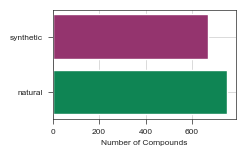

In [2]:
fig, axs = stylia.create_figure(1, 1, width=TWO_COLUMNS_WIDTH/3, height=TWO_COLUMNS_WIDTH/5)
category_counts = df["category"].value_counts()
ax = axs.next()
ax.barh(category_counts.index, category_counts.values, color=[npc, spc])
ax.set_ylabel("")
ax.set_xlabel("Number of Compounds")
ax.set_title("")

## FIGURE 1B

Natural product scores

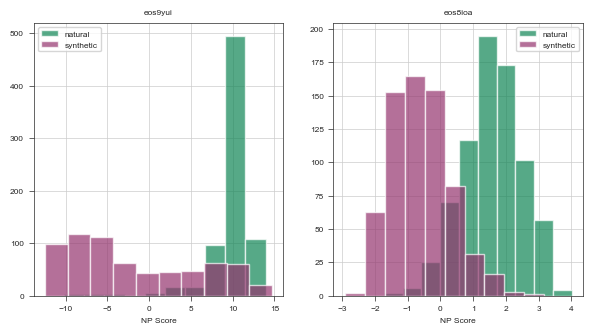

In [3]:
df = load_data("eos9yui") #NP likeness
df_ = load_data("eos8ioa") #NP score
fig, axs = stylia.create_figure(1, 2, width=TWO_COLUMNS_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.hist(df[df["category"]=="natural"]["score"], alpha = 0.7, label = "natural", color = npc)
ax.hist(df[df["category"]=="synthetic"]["score"], alpha = 0.7, label = "synthetic", color = spc)
ax.set_title("eos9yui")
ax.set_xlabel("NP Score")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(df_[df_["category"]=="natural"]["nplikeness"], alpha = 0.7, label = "natural", color=npc)
ax.hist(df_[df_["category"]=="synthetic"]["nplikeness"], alpha = 0.7, label = "synthetic", color=spc)
ax.set_title("eos8ioa")
ax.set_xlabel("NP Score")
ax.set_ylabel("")
ax.legend()

In [4]:
%%capture
#unmute the capture to see the compounds
#check the top ranked synthetic products according to each model to ensure they are well classified

df_sd = df[df["category"]=="synthetic"]
df_sd.sort_values(by="score", inplace=True, ascending=False)
top_smi = df_sd["smiles"].tolist()[:20]

from rdkit import Chem
from rdkit.Chem import Draw
mols = [Chem.MolFromSmiles(smiles) for smiles in top_smi]   
mols = [mol for mol in mols if mol is not None]
img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200))
img

In [5]:
%%capture
#unmute the capture to see the compounds
#check the bottom ranked synthetic products according to each model to ensure they are well classified

df_sd = df_[df_["category"]=="synthetic"]
df_sd.sort_values(by="nplikeness", inplace=True, ascending=False)
top_smi = df_sd["smiles"].tolist()[:20]

from rdkit import Chem
from rdkit.Chem import Draw
mols = [Chem.MolFromSmiles(smiles) for smiles in top_smi]   
mols = [mol for mol in mols if mol is not None]
img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200))
img

In [7]:
%%capture
#unmute the capture to see the compounds
#check the bottom ranked synthetic products according to each model to ensure they are well classified

df_np = df[df["category"]=="natural"]
df_np.sort_values(by="score", inplace=True, ascending=True)
top_smi = df_np["smiles"].tolist()[:20]

from rdkit import Chem
from rdkit.Chem import Draw
mols = [Chem.MolFromSmiles(smiles) for smiles in top_smi]   
mols = [mol for mol in mols if mol is not None]
img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200))
img

In [8]:
%%capture
#unmute the capture to see the compounds

df_np = df_[df_["category"]=="natural"]
df_np.sort_values(by="nplikeness", inplace=True, ascending=True)
top_smi = df_np["smiles"].tolist()[:20]

from rdkit import Chem
from rdkit.Chem import Draw
mols = [Chem.MolFromSmiles(smiles) for smiles in top_smi]   
mols = [mol for mol in mols if mol is not None]
img = Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200, 200))
img

## Figure 1C

Synthetic Accessibility score

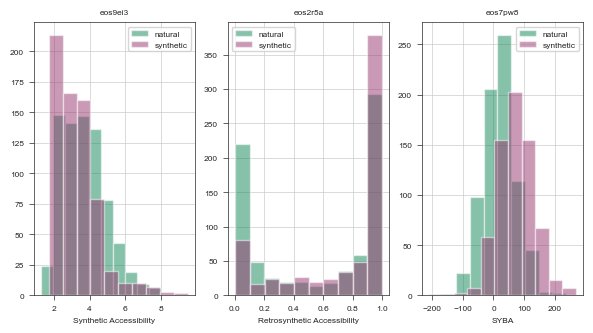

In [9]:
df1 = load_data("eos9ei3") #SA score
df2 = load_data("eos2r5a") #RA Score
df3 = load_data("eos7pw8") #SYBA
fig, axs = stylia.create_figure(1, 3, width=TWO_COLUMNS_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.hist(df1[df1["category"]=="natural"]["sa_score"], alpha = 0.5, label = "natural", color = npc)
ax.hist(df1[df1["category"]=="synthetic"]["sa_score"], alpha = 0.5, label = "synthetic", color = spc)
ax.set_title("eos9ei3")
ax.set_xlabel("Synthetic Accessibility")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(df2[df2["category"]=="natural"]["RA_score"], alpha = 0.5, label = "natural", color=npc)
ax.hist(df2[df2["category"]=="synthetic"]["RA_score"], alpha = 0.5, label = "synthetic", color=spc)
ax.set_title("eos2r5a")
ax.set_xlabel("Retrosynthetic Accessibility")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(df3[df3["category"]=="natural"]["sy_sa"], alpha = 0.5, label = "natural", color=npc)
ax.hist(df3[df3["category"]=="synthetic"]["sy_sa"], alpha = 0.5, label = "synthetic", color=spc)
ax.set_title("eos7pw8")
ax.set_xlabel("SYBA")
ax.set_ylabel("")
ax.legend()

# Figure 1D
UMAPS with Whales and Connectivity descriptors

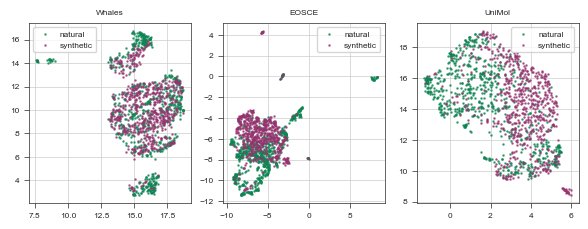

In [21]:
import umap
import numpy as np

fig, axs = stylia.create_figure(1,3, width=TWO_COLUMNS_WIDTH, height=0.33*TWO_COLUMNS_WIDTH)

ax = axs.next()
df = load_data("eos24ur")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"]=="natural"].iloc[:,4:]
descs_syn = df[df["category"]=="synthetic"].iloc[:,4:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
ax.scatter(np.transpose(np_umap)[0], np.transpose(np_umap)[1], alpha = 0.7, label="natural", color = npc, s=0.7)
ax.scatter(np.transpose(syn_umap)[0], np.transpose(syn_umap)[1], alpha = 0.7, label = "synthetic", color = spc, s=0.7)
ax.set_title("Whales")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

ax = axs.next()
df = load_data("eos2gw4")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"]=="natural"].iloc[:,4:]
descs_syn = df[df["category"]=="synthetic"].iloc[:,4:]
umap_trn = umap.UMAP(n_neighbors=50)
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
ax.scatter(np.transpose(np_umap)[0], np.transpose(np_umap)[1], alpha = 0.7, label="natural", color = npc, s=0.7)
ax.scatter(np.transpose(syn_umap)[0], np.transpose(syn_umap)[1], alpha = 0.7, label = "synthetic", color = spc, s=0.7)
ax.set_title("EOSCE")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

ax = axs.next()
df = load_data("eos39co")
df = df.dropna()
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"]=="natural"].iloc[:,4:]
descs_syn = df[df["category"]=="synthetic"].iloc[:,4:]
umap_trn = umap.UMAP(n_neighbors=50) 
all_umap = umap_trn.fit_transform(descs_array)
np_umap = umap_trn.transform(descs_nat)
syn_umap = umap_trn.transform(descs_syn)
ax.scatter(np.transpose(np_umap)[0], np.transpose(np_umap)[1], alpha = 0.7, label="natural", color = npc, s=0.7)
ax.scatter(np.transpose(syn_umap)[0], np.transpose(syn_umap)[1], alpha = 0.7, label = "synthetic", color = spc, s=0.7)
ax.set_title("UniMol")
ax.set_xlabel("")
ax.set_ylabel("")
ax.legend()

Text(0, 0.5, '')

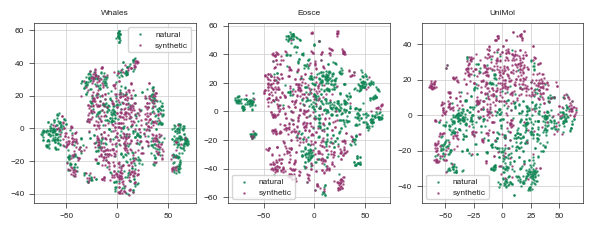

In [80]:
from sklearn.manifold import TSNE

fig, axs = stylia.create_figure(1,3, width=TWO_COLUMNS_WIDTH, height=0.33*TWO_COLUMNS_WIDTH)
ax = axs.next()
df = load_data("eos24ur")
df = df.dropna()
df = df.reset_index(drop=True)
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"]=="natural"].iloc[:,4:]
descs_syn = df[df["category"]=="synthetic"].iloc[:,4:]
tsne = TSNE(n_components=2, perplexity=30)
tsne_results = tsne.fit_transform(descs_array)
nat_idx = df[df['category'] == 'natural'].index
syn_idx = df[df['category'] == 'synthetic'].index
tsne_nat = tsne_results[nat_idx]
tsne_syn = tsne_results[syn_idx]
ax.scatter(tsne_nat[:,0], tsne_nat[:,1], alpha = 0.7, label="natural", color = npc, s=0.7)
ax.scatter(tsne_syn[:,0], tsne_syn[:,1], alpha = 0.7, label = "synthetic", color=spc, s=0.7)
ax.legend()
ax.set_title("Whales")
ax.set_xlabel("")
ax.set_ylabel("")

ax = axs.next()
df = load_data("eos2gw4")
df = df.dropna()
df = df.reset_index(drop=True)
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"]=="natural"].iloc[:,4:]
descs_syn = df[df["category"]=="synthetic"].iloc[:,4:]
tsne = TSNE(n_components=2, perplexity=30)
tsne_results = tsne.fit_transform(descs_array)
nat_idx = df[df['category'] == 'natural'].index
syn_idx = df[df['category'] == 'synthetic'].index
tsne_nat = tsne_results[nat_idx]
tsne_syn = tsne_results[syn_idx]
ax.scatter(tsne_nat[:,0], tsne_nat[:,1], alpha = 0.7, label="natural", color = npc, s=0.7)
ax.scatter(tsne_syn[:,0], tsne_syn[:,1], alpha = 0.7, label = "synthetic", color=spc, s=0.7)
ax.legend()
ax.set_title("Eosce")
ax.set_xlabel("")
ax.set_ylabel("")

ax = axs.next()
df = load_data("eos39co")
df = df.dropna()
df = df.reset_index(drop=True)
descs = df.iloc[:, 4:]
descs_array = descs.values
descs_nat = df[df["category"]=="natural"].iloc[:,4:]
descs_syn = df[df["category"]=="synthetic"].iloc[:,4:]
tsne = TSNE(n_components=2, perplexity=30)
tsne_results = tsne.fit_transform(descs_array)
nat_idx = df[df['category'] == 'natural'].index
syn_idx = df[df['category'] == 'synthetic'].index
tsne_nat = tsne_results[nat_idx]
tsne_syn = tsne_results[syn_idx]
ax.scatter(tsne_nat[:,0], tsne_nat[:,1], alpha = 0.7, label="natural", color = npc, s=0.7)
ax.scatter(tsne_syn[:,0], tsne_syn[:,1], alpha = 0.7, label = "synthetic", color=spc, s=0.7)
ax.legend()
ax.set_title("UniMol")
ax.set_xlabel("")
ax.set_ylabel("")

In [97]:
dw = load_data("eos24ur")
cols = list(dw.columns)[4:]
xw = np.array(dw[cols])
dm = load_data("eos4wt0")
cols = list(dm.columns)[4:]
xm = np.array(dm[cols])

In [105]:
from scipy.spatial.distance import pdist

dw = pdist(xw, metric="cosine")
dm = pdist(xm, metric="cosine")

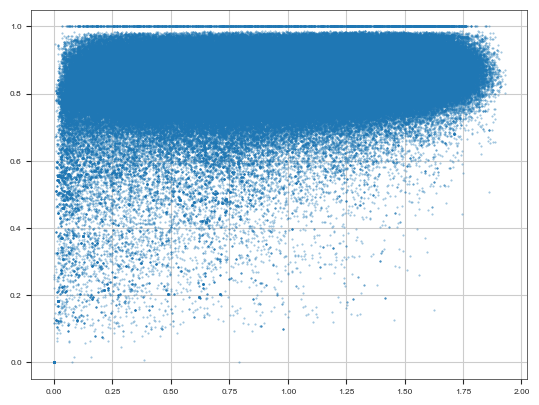

In [106]:
plt.scatter(dw, dm, s=0.2, alpha=0.5)

# Figure 1G

ADME properties

In [26]:
df  = load_data("eos7d58")

In [27]:
%%capture
cols_plot = []
for c in df.columns:
    if "drugbank_approved_percentile" in c:
        cols_plot += [c]
len(cols_plot)

import matplotlib.pyplot as plt
fig, axs = plt.subplots(25,2, figsize=(8.3,11.7))  # A4 size in inches: 11.7 x 8.3 for half A4

# Ensure there are as many axes as columns
for i, column in enumerate(cols_plot):
    ax = axs[i % 25, i // 25]  # Determine the position of the subplot
    sns.kdeplot(df[df["category"] == "synthetic"][column], ax=ax, alpha=0.5, color=spc, fill=True)
    sns.kdeplot(df[df["category"] == "natural"][column], ax=ax, alpha=0.3, color=npc, fill=True)
    ax.set_title(column.replace("_drugbank_approved_percentile", ""))
    ax.set_xlabel('')  # Remove individual x-axis labels for cleaner look
    ax.set_ylabel('')  # Remove individual y-axis labels for cleaner look
    ax.set_xlim(-10,110)

plt.tight_layout()  # Adjust subplots to fit in figure area.
plt.show()

In [11]:
all_props = [
    "molecular_weight", "logP", "hydrogen_bond_acceptors", "hydrogen_bond_donors", "Lipinski", "QED",
    "stereo_centers", "tpsa", "AMES", "BBB_Martins", "Bioavailability_Ma", "CYP1A2_Veith",
    "CYP2C19_Veith", "CYP2C9_Substrate_CarbonMangels", "CYP2C9_Veith", "CYP2D6_Substrate_CarbonMangels",
    "CYP2D6_Veith", "CYP3A4_Substrate_CarbonMangels", "CYP3A4_Veith", "Carcinogens_Lagunin", "ClinTox",
    "DILI", "HIA_Hou", "NR-AR-LBD", "NR-AR", "NR-AhR", "NR-Aromatase", "NR-ER-LBD", "NR-ER", "NR-PPAR-gamma",
    "PAMPA_NCATS", "Pgp_Broccatelli", "SR-ARE", "SR-ATAD5", "SR-HSE", "SR-MMP", "SR-p53", "Skin_Reaction",
    "hERG", "Caco2_Wang", "Clearance_Hepatocyte_AZ", "Clearance_Microsome_AZ", "Half_Life_Obach",
    "HydrationFreeEnergy_FreeSolv", "LD50_Zhu", "Lipophilicity_AstraZeneca", "PPBR_AZ", "Solubility_AqSolDB",
    "VDss_Lombardo"
]

In [12]:
%%capture
import seaborn as sns

for p in all_props:
    prop = p + "_drugbank_approved_percentile"
    fig, ax = plt.subplots(1,1)
    sns.kdeplot(df[df["category"]=="natural"][prop], alpha = 0.7, color = npc, fill=True)
    sns.kdeplot(df[df["category"]=="synthetic"][prop], alpha = 0.7, color = spc, fill = True)
    plt.title(p)
    plt.savefig(f"../figures/admet_props/{p}.png", dpi=300)

In [28]:
selected_props = [
    "molecular_weight", "logP", "Solubility_AqSolDB",
    "BBB_Martins", "Bioavailability_Ma", 
    "CYP2C9_Veith", "CYP3A4_Veith",
    "DILI", "Carcinogens_Lagunin", "hERG",
    "NR-AR-LBD", "NR-PPAR-gamma",
    "SR-ARE", "Skin_Reaction",
    "Clearance_Hepatocyte_AZ", "HIA_Hou",
]
print(len(selected_props))

16


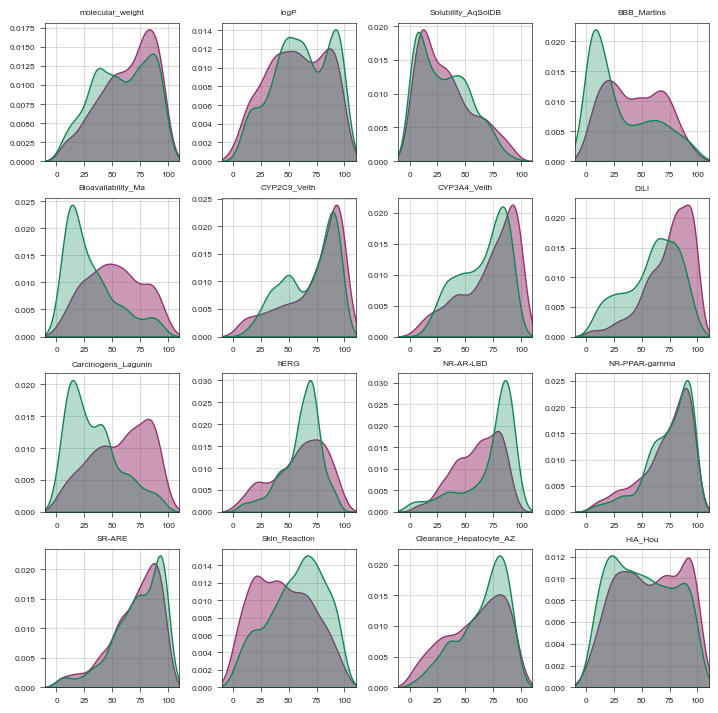

In [30]:
cols_plot = []
for c in selected_props:
    cols_plot += [c + "_drugbank_approved_percentile"]
cols_plot

fig, axs = stylia.create_figure(4, 4, width=TWO_COLUMNS_WIDTH, height=TWO_COLUMNS_WIDTH)

# Ensure there are as many axes as columns
for i, column in enumerate(cols_plot):
    ax = axs.next()
    sns.kdeplot(df[df["category"] == "synthetic"][column], ax=ax, alpha=0.5, color=spc, fill=True)
    sns.kdeplot(df[df["category"] == "natural"][column], ax=ax, alpha=0.3, color=npc, fill=True)
    ax.set_title(column.replace("_drugbank_approved_percentile", ""))
    ax.set_xlabel('')  # Remove individual x-axis labels for cleaner look
    ax.set_ylabel('')  # Remove individual y-axis labels for cleaner look
    ax.set_xlim(-10,110)

plt.tight_layout()  # Adjust subplots to fit in figure area.
plt.show()

## PCAs

In [37]:
np_df = pd.read_csv("../data/np_pca.csv")
sd_df = pd.read_csv("../data/sd_pca.csv")
moe = ['AM1_dipole', 'AM1_HF', 'AM1_HOMO', 'AM1_IP', 'AM1_LUMO', 'apol', 'ASA', 'ASA_H', 'ASA_P', 'acc', 'acid', 'aro', 'base', 'count', 'don', 'donacc', 'heavy', 'hyd', 'nC', 'nN', 'nO', '1rotN', 'ar', 'count-1', 'chiral', 'E', 'E_rele', 'E_rvdw', 'E_sol', 'FCharge', 'lip_violation', 'logP(o/w)', 'logS', 'mr', 'opr_leadlike', 'rsynth', 'TPSA', 'vol', 'VSA', 'Weight']

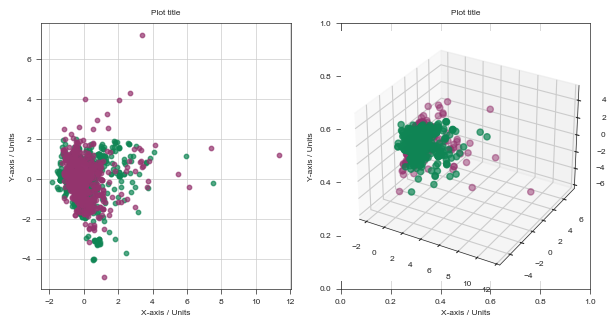

In [75]:
fig, axs = stylia.create_figure(1, 2, width=TWO_COLUMNS_WIDTH, height=ONE_COLUMN_WIDTH)
ax = axs.next()
ax.scatter(np_df["PCA1"].tolist(), np_df["PCA2"].tolist(), alpha = 0.7, label="natural", color = npc)
ax.scatter(sd_df["PCA1"].tolist(), sd_df["PCA2"].tolist(), alpha = 0.7, label="synthetic", color = spc)

ax = axs.next()
ax = fig.add_subplot(122,projection='3d')
ax.scatter(np_df["PCA1"].tolist(), np_df["PCA2"].tolist(), np_df["PCA3"].tolist(),alpha = 0.7, label="natural", color = npc)
ax.scatter(sd_df["PCA1"].tolist(), sd_df["PCA2"].tolist(), sd_df["PCA3"].tolist(), alpha = 0.5, label="synthetic", color = spc)

## Suplementary

COVID predicted activity with REDIAL-2000 (eos8fth), ImageMol (eos4cxk) and SarsCov1 Chemprop (eos9f6t)

In [83]:
eos8fth = load_data("eos8fth")
eos8fth.columns
db = pd.read_csv("../data/drugbank_eos8fth.csv")

In [84]:
db

,key,input,AlphaLISA,CoV1-PPE,cytotox,CPE,ACE2,CoV1-PPE_cs,TruHit,MERS-PPE_cs,hCYTOX,MERS-PPE,3CL
0,OIRCOABEOLEUMC-GEJPAHFPSA-N,CC[C@H](C)[C@H](NC(=O)[C@H](CCC(O)=O)NC(=O)[C@...,0.514254,0.506634,0.803359,0.440970,0.352777,0.540000,0.073333,0.287772,0.783847,0.667425,0.583333
1,GFIJNRVAKGFPGQ-LIJARHBVSA-N,CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(N)=N)NC(=...,0.468164,0.612687,0.819761,0.568546,0.522261,0.280096,0.053362,0.105380,0.827666,0.921227,0.880000
2,BLCLNMBMMGCOAS-URPVMXJPSA-N,CC(C)C[C@H](NC(=O)[C@@H](COC(C)(C)C)NC(=O)[C@H...,0.333814,0.526235,0.809992,0.597445,0.624882,0.301122,0.070000,0.119140,0.809507,0.934911,0.780000
3,NDAYQJDHGXTBJL-MWWSRJDJSA-N,CC(C)C[C@@H](NC(=O)CNC(=O)[C@@H](NC=O)C(C)C)C(...,0.546091,0.582138,0.783423,0.604961,0.546551,0.590000,0.053550,0.199638,0.753766,0.940580,0.900000
4,NFLWUMRGJYTJIN-PNIOQBSNSA-N,NC(=O)CC[C@@H]1NC(=O)[C@H](CC2=CC=CC=C2)NC(=O)...,0.407926,0.519585,0.762959,0.528231,0.337061,0.336673,0.073948,0.166163,0.822686,0.209993,0.366667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11918,ACZCJTHHWMBFKC-UHFFFAOYSA-N,CC1=C(COC2=CC=C(N=N2)C(=O)NC2CCOCC2)C(=NO1)C1=...,0.655148,0.339086,0.734717,0.613310,0.627768,0.497724,0.747731,0.394930,0.508036,0.599547,0.556667
11919,XPLZTJWZDBFWDE-OYOVHJISSA-N,CN1C=C(C=N1)C1=CN2N=CC=C2C(=N1)C1=CN(N=C1)[C@@...,0.715638,0.359163,0.744018,0.750962,0.638529,0.592752,0.790763,0.602673,0.725074,0.706277,0.603333
11920,DORJQZDOULKINH-QNBGGDODSA-N,OC(=O)CCCCC(O)=O.C[C@@H](N)COC1=CC=C(C=C1)C1=C...,0.624644,0.648323,0.771112,0.802373,0.390032,0.587553,0.696148,0.287604,0.481258,0.933309,0.773333
11921,KOEUOFPEZFUWRF-LJQANCHMSA-N,NC1=C2N(C(=O)N([C@@H]3CCCN(C3)C(=O)C=C)C2=CC=N...,0.784967,0.556662,0.827919,0.738835,0.645434,0.746927,0.858636,0.632674,0.472608,0.933588,0.806667


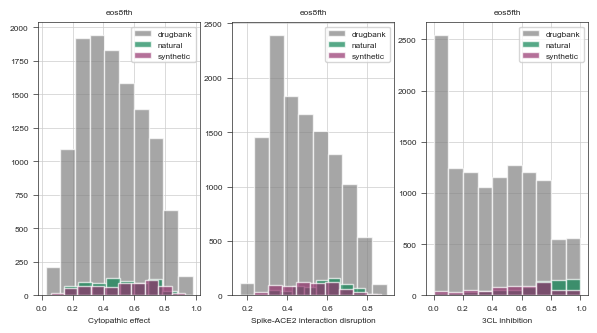

In [86]:
fig, axs = stylia.create_figure(1, 3, width=TWO_COLUMNS_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.hist(db["CPE"], alpha = 0.7, label = "drugbank", color = "gray")
ax.hist(eos8fth[eos8fth["category"]=="natural"]["CPE"], alpha = 0.7, label = "natural", color = npc)
ax.hist(eos8fth[eos8fth["category"]=="synthetic"]["CPE"], alpha = 0.7, label = "synthetic", color = spc)
ax.set_title("eos8fth")
ax.set_xlabel("Cytopathic effect")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(db["AlphaLISA"], alpha = 0.7, label = "drugbank", color = "gray")
ax.hist(eos8fth[eos8fth["category"]=="natural"]["AlphaLISA"], alpha = 0.7, label = "natural", color = npc)
ax.hist(eos8fth[eos8fth["category"]=="synthetic"]["AlphaLISA"], alpha = 0.7, label = "synthetic", color = spc)
ax.set_title("eos8fth")
ax.set_xlabel("Spike-ACE2 interaction disruption")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(db["3CL"], alpha = 0.7, label = "drugbank", color = "gray")
ax.hist(eos8fth[eos8fth["category"]=="natural"]["3CL"], alpha = 0.7, label = "natural", color = npc)
ax.hist(eos8fth[eos8fth["category"]=="synthetic"]["3CL"], alpha = 0.7, label = "synthetic", color = spc)
ax.set_title("eos8fth")
ax.set_xlabel("3CL inhibition")
ax.set_ylabel("")
ax.legend()

In [89]:
eos4cxk = load_data("eos4cxk")
eos4cxk.columns
db = pd.read_csv("../data/drugbank_eos4cxk.csv")

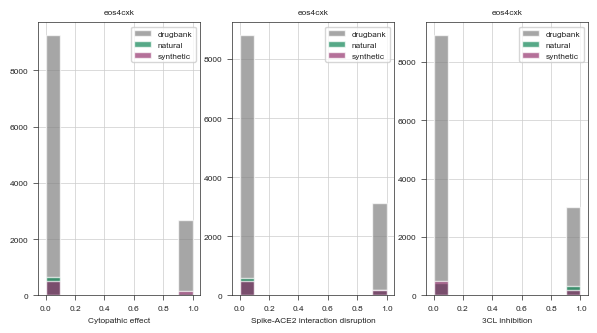

In [90]:
fig, axs = stylia.create_figure(1, 3, width=TWO_COLUMNS_WIDTH, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.hist(db["CoV2_CPE"], alpha = 0.7, label = "drugbank", color = "gray")
ax.hist(eos4cxk[eos4cxk["category"]=="natural"]["CoV2_CPE"], alpha = 0.7, label = "natural", color = npc)
ax.hist(eos4cxk[eos4cxk["category"]=="synthetic"]["CoV2_CPE"], alpha = 0.7, label = "synthetic", color = spc)
ax.set_title("eos4cxk")
ax.set_xlabel("Cytopathic effect")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(db["AlphaLISA"], alpha = 0.7, label = "drugbank", color = "gray")
ax.hist(eos4cxk[eos4cxk["category"]=="natural"]["AlphaLISA"], alpha = 0.7, label = "natural", color = npc)
ax.hist(eos4cxk[eos4cxk["category"]=="synthetic"]["AlphaLISA"], alpha = 0.7, label = "synthetic", color = spc)
ax.set_title("eos4cxk")
ax.set_xlabel("Spike-ACE2 interaction disruption")
ax.set_ylabel("")
ax.legend()
ax = axs.next()
ax.hist(db["3CL"], alpha = 0.7, label = "drugbank", color = "gray")
ax.hist(eos4cxk[eos4cxk["category"]=="natural"]["3CL"], alpha = 0.7, label = "natural", color = npc)
ax.hist(eos4cxk[eos4cxk["category"]=="synthetic"]["3CL"], alpha = 0.7, label = "synthetic", color = spc)
ax.set_title("eos4cxk")
ax.set_xlabel("3CL inhibition")
ax.set_ylabel("")
ax.legend()

In [92]:
eos9f6t = load_data("eos9f6t")
eos9f6t.columns
db = pd.read_csv("../data/drugbank_eos9f6t.csv")

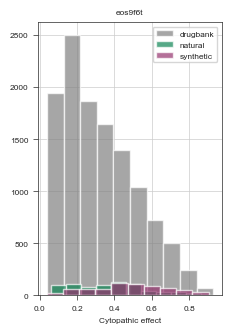

In [93]:
fig, axs = stylia.create_figure(1, 1, width=TWO_COLUMNS_WIDTH/3, height=0.5 * TWO_COLUMNS_WIDTH)
ax = axs.next()
ax.hist(db["activity"], alpha = 0.7, label = "drugbank", color = "gray")
ax.hist(eos9f6t[eos9f6t["category"]=="natural"]["activity"], alpha = 0.7, label = "natural", color = npc)
ax.hist(eos9f6t[eos9f6t["category"]=="synthetic"]["activity"], alpha = 0.7, label = "synthetic", color = spc)
ax.set_title("eos9f6t")
ax.set_xlabel("Cytopathic effect")
ax.set_ylabel("")
ax.legend()